# Lasso Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

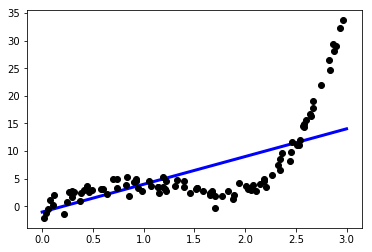

In [4]:
clf = linear_model.LassoCV(alphas=[1.0,10.0,20.0])
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Proszę wykonać regresję (Ridge Regression) oraz klasyczną regresję z różną ilosćią parametrów oraz stopniem wielomianu. 

In [7]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge LR', linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])))
models.append(('PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])) ))
models.append(('Lasso PR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])) ))

models.append(('PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])) ))
models.append(('Lasso PR degree 3', make_pipeline(PolynomialFeatures(3), linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])) ))

models.append(('PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.Ridge(alpha=1.0)) ))
models.append(('Lasso PR degree 4', make_pipeline(PolynomialFeatures(4), linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])) ))

models.append(('PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
models.append(('Ridge PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])) ))
models.append(('Lasso PR degree 10', make_pipeline(PolynomialFeatures(10), linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])) ))



In [8]:
x_plot = np.vstack(np.linspace(0, 3, 100))

for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)

LR
Ridge LR
PR degree 2
Ridge PR degree 2
Lasso PR degree 2
PR degree 3
Ridge PR degree 3
Lasso PR degree 3
PR degree 4
Ridge PR degree 4
Lasso PR degree 4
PR degree 10
Ridge PR degree 10
Lasso PR degree 10


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

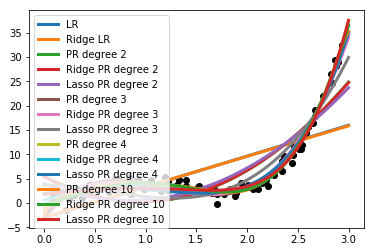

In [9]:
x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
plt.legend()    
plt.show()



In [10]:
# prepare models
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [11]:
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: -4.154270 (0.827562)
Ridge LR: -4.129162 (0.832510)
PR degree 2: -3.169333 (0.599444)
Ridge PR degree 2: -3.162070 (0.605417)
Lasso PR degree 2: -3.138793 (0.657378)
PR degree 3: -0.973556 (0.154338)
Ridge PR degree 3: -1.048588 (0.150225)
Lasso PR degree 3: -2.135118 (0.430424)
PR degree 4: -0.764253 (0.209209)
Ridge PR degree 4: -0.839992 (0.207429)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

Lasso PR degree 4: -1.138586 (0.274157)
PR degree 10: -0.774939 (0.246672)
Ridge PR degree 10: -0.771610 (0.214719)
Lasso PR degree 10: -0.965113 (0.256539)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

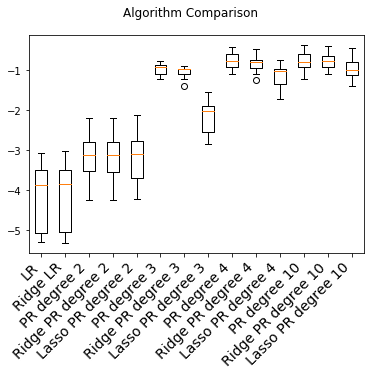

In [12]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=14)
plt.show()  

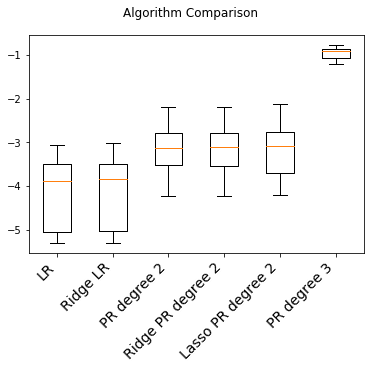

In [13]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results[0:6])
ax.set_xticklabels(names, rotation=45, ha='right', fontsize=14)

plt.show() 

# Zdanie 
Zinterpretuj wyniki. 